In [10]:
from data import load_data, GS_Dataset, make_gs_dataset
from model import Narx, DEVICE
from util_fun import train_narx_simval, narx_sim_nrms
import torch
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split



In [11]:
n_a=15
n_b=25
n_layers=5
n_nodes=50
n_epochs=15_000

In [12]:
model=Narx(n_a+n_b,n_nodes, n_layers).to(DEVICE)

In [13]:
x_data, y_data= load_data()
data = make_gs_dataset(x_data, y_data, n_a, n_b, DEVICE)

In [14]:
results = train_narx_simval(model, n_a, n_b, data, n_epochs=n_epochs)

Checkpoint at epoch 1:  

current best pred NRMS: 1.010388778347987, previous best pred NRMS: inf 

current best sim NRMS: 1.0079577754325288, previous best sim NRMS: inf 

Checkpoint at epoch 601:  

current best pred NRMS: 0.034325849629905855, previous best pred NRMS: 1.010388778347987 

current best sim NRMS: 0.09382400943375722, previous best sim NRMS: 1.0079577754325288 

Checkpoint at epoch 1201:  

current best pred NRMS: 0.021731581877653543, previous best pred NRMS: 0.034325849629905855 

current best sim NRMS: 0.07154684159233267, previous best sim NRMS: 0.09382400943375722 

Checkpoint at epoch 1801:  

current best pred NRMS: 0.018018740021442648, previous best pred NRMS: 0.021731581877653543 

current best sim NRMS: 0.06374137675905026, previous best sim NRMS: 0.07154684159233267 

Checkpoint at epoch 2401:  

current best pred NRMS: 0.015781507754322178, previous best pred NRMS: 0.018018740021442648 

current best sim NRMS: 0.05986368799733484, previous best sim NRMS: 0.

In [15]:
torch.save(results.best_sim_model.state_dict(), f'narx{n_epochs//1000}K_na{n_a}_nb{n_b}_nlay{n_layers}_nnode{n_nodes}_sim')

In [16]:
_,y_true,ylist,nrms=narx_sim_nrms(results.best_sim_model, n_a, n_b, x_data, y_data, True, DEVICE, 5000)
_,_,_,nrms_train=narx_sim_nrms(results.best_sim_model, n_a, n_b, data.x_data_train, data.y_data_train, True, DEVICE, 5000)
_,_,_,nrms_test=narx_sim_nrms(results.best_sim_model, n_a, n_b, data.x_data_test, data.y_data_test, True, DEVICE, 5000)
_,_,_,nrms_val=narx_sim_nrms(results.best_sim_model, n_a, n_b, data.x_data_val, data.y_data_val, True, DEVICE, 5000)


In [17]:
f'train nrms: {nrms_train:.2%}, val nrms:{nrms_val:.2%}, test nrms: {nrms_test:.2%}'

'train nrms: 3.00%, val nrms:3.11%, test nrms: 4.28%'

Text(0, 0.5, 'Angle [rad]')

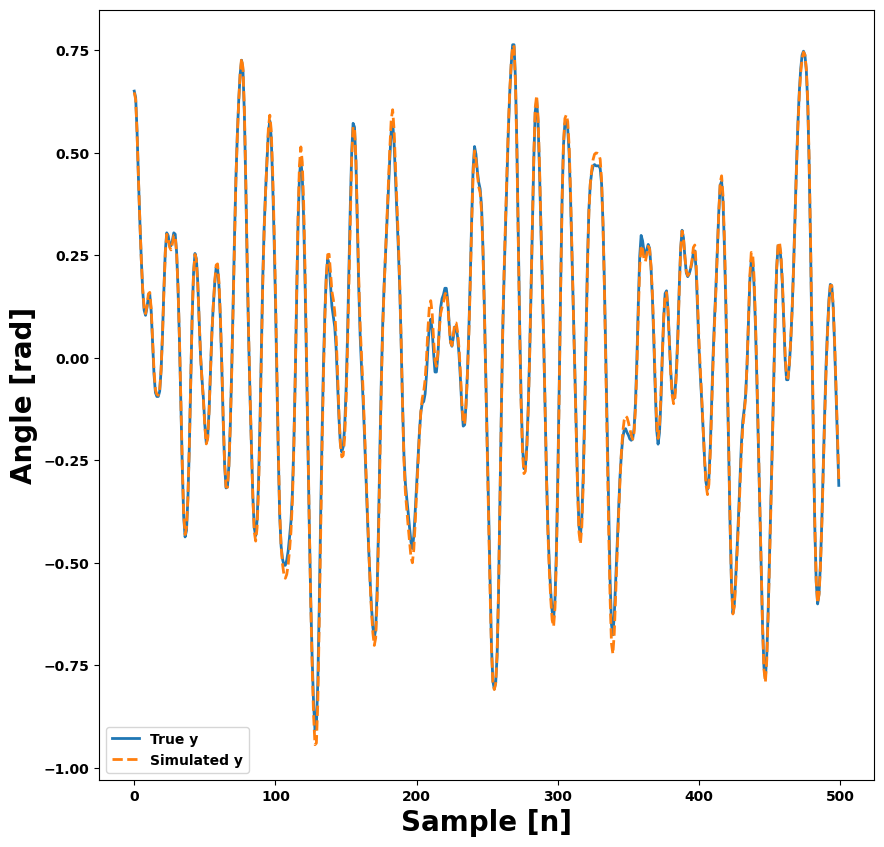

In [18]:
start=0
end=500
fs=20
plt.figure(figsize=(10,10))
plt.plot(y_true[start:end], label='True y', lw=2)
plt.plot(ylist[start:end], label='Simulated y', ls='--', lw=2)
plt.legend()
plt.xlabel('Sample [n]',fontsize=fs)
plt.ylabel('Angle [rad]',fontsize=fs)